In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.layers import Activation, add, BatchNormalization, Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


test.csv
train.csv



In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_X, val_X, train_Y, val_Y = train_test_split(train.iloc[:,1:].values, 
                                                train.iloc[:,0].values, test_size=0.1)

Text(0.5,1,'28x28 data')

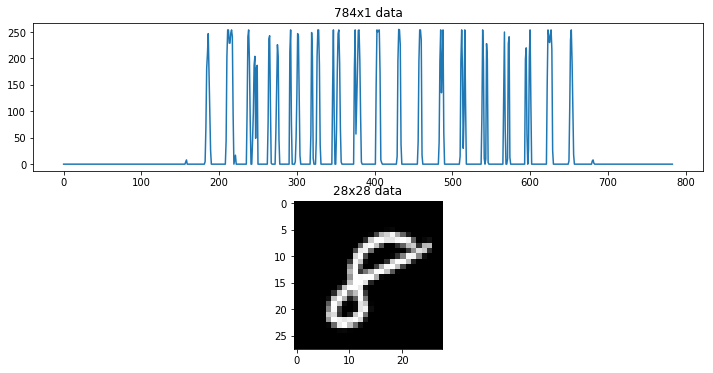

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(train_X[5])
ax[0].set_title('784x1 data')
ax[1].imshow(train_X[5].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [5]:
# Reshape all data to 28 x 28
train_X, val_X = train_X.reshape(-1, 28, 28, 1), val_X.reshape(-1, 28, 28, 1)
# Convert to 0-1 range
train_X = train_X.astype("float32")/255.0
val_X = val_X.astype("float32")/255.0

In [6]:
# One-hot encoding
train_Y, val_Y = to_categorical(train_Y), to_categorical(val_Y)

In [7]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [8]:
# Data augmentation - from adversarial learning- Jacobian
datagen = ImageDataGenerator()

In [9]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [10]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [11]:
hist = model.fit_generator(datagen.flow(train_X, train_Y, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(val_X, val_Y), 
                           callbacks=[annealer])

Epoch 1/20
 - 52s - loss: 0.5107 - acc: 0.8400 - val_loss: 0.3387 - val_acc: 0.9033
Epoch 2/20
 - 52s - loss: 0.1946 - acc: 0.9420 - val_loss: 0.1502 - val_acc: 0.9617
Epoch 3/20
 - 52s - loss: 0.1600 - acc: 0.9533 - val_loss: 0.0771 - val_acc: 0.9764
Epoch 4/20
 - 52s - loss: 0.1427 - acc: 0.9591 - val_loss: 0.0836 - val_acc: 0.9783
Epoch 5/20
 - 52s - loss: 0.1071 - acc: 0.9704 - val_loss: 0.0939 - val_acc: 0.9757
Epoch 6/20
 - 50s - loss: 0.0893 - acc: 0.9751 - val_loss: 0.0750 - val_acc: 0.9790
Epoch 7/20
 - 52s - loss: 0.0948 - acc: 0.9720 - val_loss: 0.0669 - val_acc: 0.9802
Epoch 8/20
 - 51s - loss: 0.0947 - acc: 0.9725 - val_loss: 0.0557 - val_acc: 0.9845
Epoch 9/20
 - 51s - loss: 0.0793 - acc: 0.9761 - val_loss: 0.0472 - val_acc: 0.9871
Epoch 10/20
 - 52s - loss: 0.0558 - acc: 0.9825 - val_loss: 0.0524 - val_acc: 0.9881
Epoch 11/20
 - 53s - loss: 0.0661 - acc: 0.9809 - val_loss: 0.0542 - val_acc: 0.9867
Epoch 12/20
 - 53s - loss: 0.0654 - acc: 0.9816 - val_loss: 0.0499 - val_a

In [12]:
final_loss, final_acc = model.evaluate(val_X, val_Y)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))



4200/4200 [==============================] - 6s 1ms/step
Final loss: 0.0343, final accuracy: 0.9910


In [13]:
y_hat = model.predict(val_X)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(val_Y, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[432   0   0   0   0   1   0   0   0   0]
 [  0 437   0   0   0   0   0   0   1   0]
 [  0   1 427   1   0   0   0   5   0   0]
 [  0   0   6 456   0   1   0   1   1   0]
 [  0   0   0   0 387   0   0   0   0   2]
 [  0   0   0   2   0 368   0   0   2   1]
 [  1   0   0   0   0   1 415   0   0   0]
 [  0   0   2   0   0   0   0 414   0   0]
 [  0   1   0   0   0   0   0   0 407   1]
 [  0   0   0   0   2   1   1   3   0 419]]


In [14]:
test = np.loadtxt('../input/test.csv', skiprows=1, dtype='int', delimiter=',')
test_X = test.astype("float32")
test_X = test_X.reshape(-1, 28, 28, 1)/255.
y_hat = model.predict(test_X, batch_size=64)
y_pred = np.argmax(y_hat,axis=1)
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [15]:
with open('submission_keras.csv', 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))